In [1]:
# Importing all necessary libraries here
import mysql.connector as mysql
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

## 1

###  Import and warehouse data

In [2]:
#Connecting to database
try:
    mydb = mysql.connect(host = 'localhost',
                  database = 'telecom',
                 user = 'root',
                 password = 'varaprasad@13')
except Exception as e:
    print(e)

In [3]:
#creating a cursor
mycursor = mydb.cursor(buffered = True)

In [4]:
# show available tables
query = 'show tables'
mycursor.execute(query)
tables = mycursor.fetchall()
for table in tables:
    print(table)

('telcomcustomerchurn1',)
('telcomcustomerchurn2',)


In [5]:
# selecting a table
query = 'select * from telecom.telcomcustomerchurn1'
mycursor.execute(query)

In [6]:
# creating a database with table1
df1 = pd.read_sql(query,mydb)

In [7]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [8]:
# selecting a table
query = 'select * from telecom.telcomcustomerchurn2'
mycursor.execute(query)

In [9]:
# creating a database with table1
df2 = pd.read_sql(query,mydb)

In [10]:
df2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
df1.shape

(7043, 10)

In [12]:
df2.shape

(7043, 12)

In [13]:
df1.size

70430

In [14]:
df2.size

84516

### Review
- The dataset telecomcustomerchurn1 contain 7043 rows and 10 columns and 
- The dataset telecomcustomerchurn2 contain 7043 rows and 12 columns

In [15]:
# Merging of dataset 1 and dataset2
df = pd.merge(df1,df2,how = 'inner')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.shape

(7043, 21)

In [17]:
df.size

147903

- Final dataset having a shape of 7043 * 21 with size of 147903

In [18]:
# Checking columns of the data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
# Columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Dataset have 2 float 2 integer and 17 object data types
- 7043 Non null values in each column

In [20]:
# Statistical summery of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Review
- There are 3555 males and 3488 females
- More people with no partner
- 6361 peoples have phone service
- 3875 peoples are signed for month-on-month contract
- 5174 peoples didn't churn

## 2

### Data cleansing and Exploratory data analysis

In [22]:
# function for null Values

def check_null(data):
    return (data.isna().sum() * 100)/len(data)

In [23]:
# CHecking null Values
check_null(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [24]:
# Function for duplicate values

def check_duplicates(data):
    return data.duplicated().sum()

In [25]:
# Checking duplicate values
check_duplicates(df)

0

### Review:
- There is no null values in data
- There is no duplicate values either

In [26]:
df_en = df.copy()
df_en.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Droping a redundant column customerID 

In [27]:
# function for droping a column

def drop_col(col):
    return df_en.drop(col,inplace = True, axis = 1)

In [28]:
drop_col('customerID')

In [29]:
df_en.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Encoding a Churn because it's a target variable

In [30]:
df_en['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [31]:
def encode_it(data,col):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    return data[col]

In [32]:
encode_it(df_en,'Churn')

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [33]:
df_en['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Review
- Out of 7043 customers 1869 customers churn 

In [34]:
df_en.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Data Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

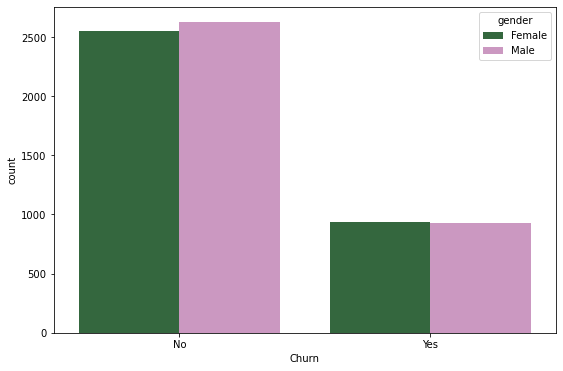

In [35]:
figure(figsize = (9,6))
sns.countplot(x = 'Churn', data = df, hue = 'gender',palette = 'cubehelix')

### Analysis

- Almost equal number of males and females are churn the telecom

<AxesSubplot:xlabel='Churn', ylabel='count'>

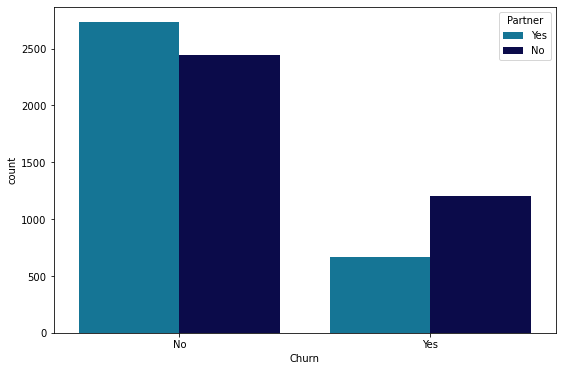

In [36]:
figure(figsize = (9,6))
sns.countplot(x = 'Churn', data = df, hue = 'Partner', palette = 'ocean_r')

### Analysis
- People who don't have partner churn more 
- More people with partner still in this telecom

<AxesSubplot:xlabel='Churn', ylabel='count'>

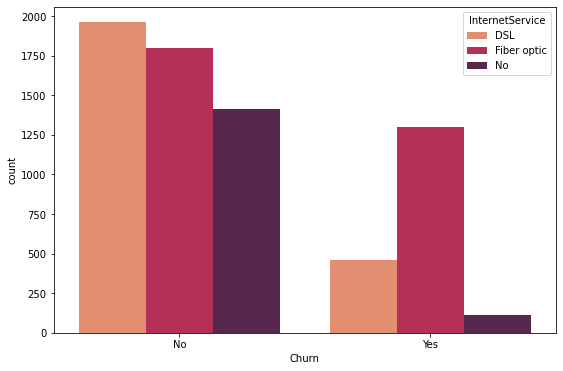

In [37]:
figure(figsize = (9,6))
sns.countplot(x = 'Churn', data = df, hue = 'InternetService', palette = 'rocket_r')

### Analysis
- More people with fiber optic service churn the company than the other services

<AxesSubplot:xlabel='Churn', ylabel='count'>

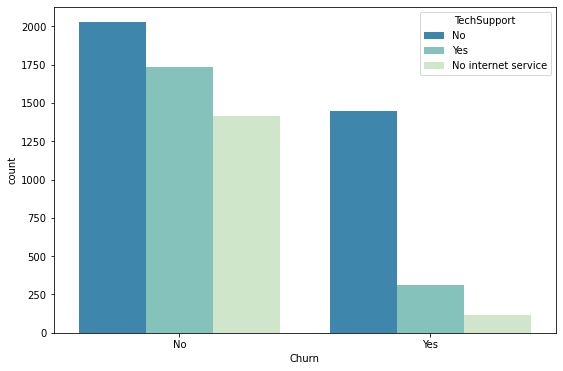

In [38]:
figure(figsize = (9,6))
sns.countplot(x = 'Churn', data = df, hue = 'TechSupport', palette = 'GnBu_r')

### Analysis
- People who churn, didn't get a tech support more


<AxesSubplot:xlabel='Churn', ylabel='count'>

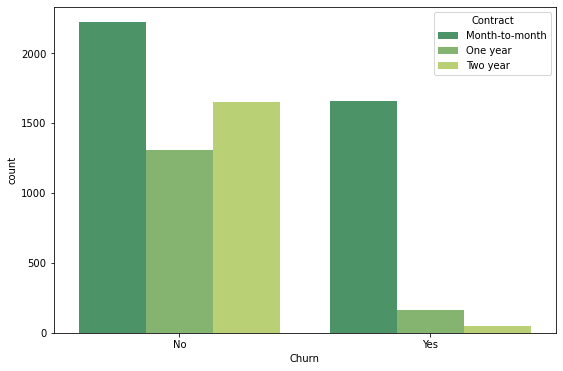

In [39]:
figure(figsize = (9,6))
sns.countplot(x = 'Churn', data = df, hue = 'Contract', palette = 'summer')

### Analysis
- More people who churn have month-to-month contract
- More the contract less the churn 

<AxesSubplot:xlabel='tenure', ylabel='count'>

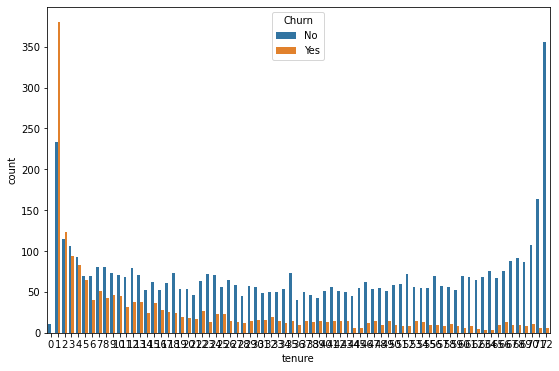

In [40]:
figure(figsize = (9,6))
sns.countplot(x = 'tenure', data = df, hue = 'Churn')

### Analysis
- People with less tenure period churn the more

<AxesSubplot:xlabel='MonthlyCharges'>

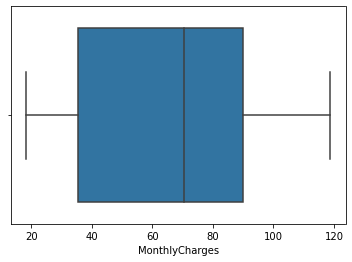

In [41]:
sns.boxplot(df_en['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

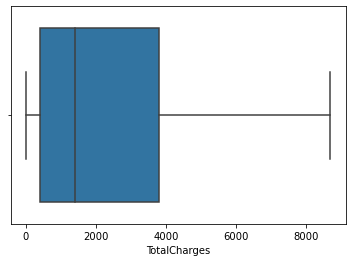

In [42]:
sns.boxplot(df_en['TotalCharges'])

### Encoding Catgorical Variables

In [43]:
cat = df_en.select_dtypes(include = 'O').columns
cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [44]:
for i in cat:
    encode_it(df_en,i)

In [45]:
df_en.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

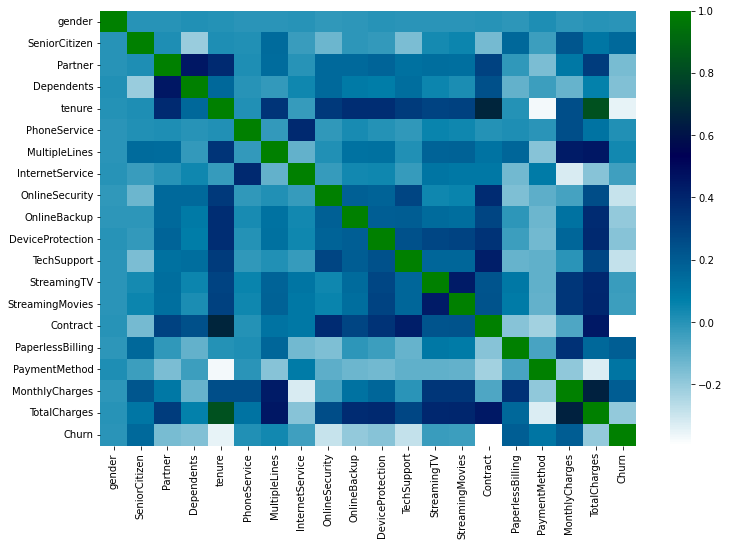

In [46]:
figure(figsize = (12,8))
sns.heatmap(df_en.corr(),cmap = 'ocean_r')

### Analysis
- More relation to tenure and total charge, tenure and contract
- churn more corelated to monthly charge, senior citizen, paperlessbilling

## 3

### Data Preparation for model building

In [47]:
df_en.shape

(7043, 20)

In [48]:
# separate independent and target variable(churn)

X = df_en.iloc[:,:19]
Y = df_en.iloc[:,-1]

In [49]:
# Spliting of dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state = 47)


In [50]:
scale = StandardScaler()
X_train.iloc[:,:] = scale.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:]  = scale.fit_transform(X_test.iloc[:,:])

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(4930, 19) (2113, 19)
(4930,) (2113,)


## 4

## Model training, and testing

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [52]:
# Predicting the model
Y_predict = model.predict(X_test)

In [53]:
# Accuracy score
accuracy_score(Y_test,Y_predict)

0.7998106956933271

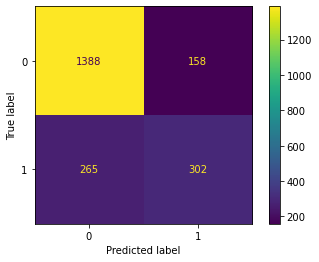

In [54]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, Y_test)  
plt.show()

In [55]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1546
           1       0.66      0.53      0.59       567

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



### Naive Bayes 

In [56]:
# import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. 
# To fit the model, we pass x_train and y_train.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [57]:
# compute y predicted labels
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [58]:
# Accuracy
print('accuracy:',accuracy_score(Y_test,y_pred_gnb))

accuracy: 0.7610033128253668


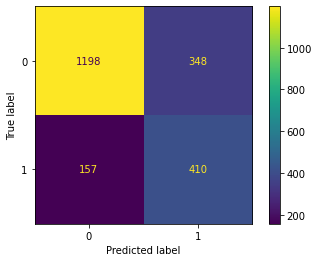

In [59]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

In [60]:
# Compute precision, recall and F1-score
print(classification_report(Y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.77      0.83      1546
           1       0.54      0.72      0.62       567

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



### KNN Classifier

In [61]:
# Fit the KNN classifier model to the train dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
# compute y predicted labels
y_pred_knn = knn.predict(X_test)
y_pred_knn[:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [63]:
## accuracy
print('accuracy:',accuracy_score(Y_test,y_pred_knn))

accuracy: 0.754850922858495


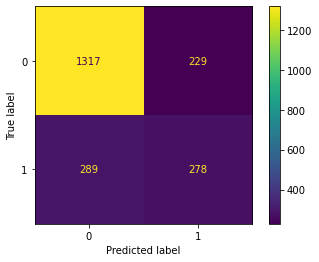

In [64]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [65]:
# Compute precision, recall and F1-score
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1546
           1       0.55      0.49      0.52       567

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.75      0.75      2113



## Analysis
- Logistic Regression Accuracy score = 0.7998106956933271
- Naive bayes Accuracy score = 0.7610033128253668
- KNN Accuracy Score = 0.754850922858495

It's clear that logistic regression model done well for this data than the Naive bayes and KNN
- So, Logistic regression model well fit in this telecom data

## 5

###  Conclusion and improvisation

From the EDA we can say that
- people who have less tenure churn more
- people with less tech support churn more
- More people month-on-month contract are churn
- who don't have partner and dependent churn more

We implemented a machine learning model to find a people who will churn. Implemented a logistic regression,naive bayes and KNN models for predict churn

- In that models, Logistic regression performs better than the other two models with 80% accuracy
- Naive bayes detected the more False Negatives compare to other models
- True positives more detected by the Logistic Regression